### Final project - IBM HR Analytics Employee Attrition & Performance

## **Data Retrieving and EDA** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# dataset path
file_path = 'IBM-HR-Employee-Attrition.csv'

# reading our dataset as a dataframe
df = pd.read_csv(file_path)


**There is no null value in any features according to the information, and the feature employeecount, employeenumber, Over18 and standardHours seem to have no impact on the response variable. So we decide to drop these four features.**

In [4]:
df = df.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'], axis='columns')


**According to the dataset information, we should select the 'object' and 'int64' type feature and encode the object type feature.**

In [5]:
categorical_columns = [colname for colname in df.columns if df[colname].dtype == "object"]
numerical_columns = [colname for colname in df.columns if df[colname].dtype == "int64"]


**Determine the missing value of the dataset**

In [6]:
missing_counts_numerical = df[numerical_columns].isna().sum().sort_values(ascending=False)


In [7]:


missing_counts_categorical = df[categorical_columns].isna().sum().sort_values(ascending=False)


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [10]:
df.shape

(1470, 31)

In [11]:
np.round(df.corr(),2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,...,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


**Data preprocessing**

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

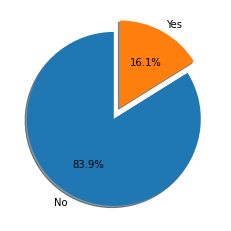

In [14]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1, autopct='%1.1f%%',  shadow=True, startangle=90);

**Use labelencoder to transform catogory data**

In [15]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
for cat in categorical_columns:
    df[cat]=le.fit_transform(df[cat])

**Rescale numeric data**

In [16]:
MMS = MinMaxScaler()
df[numerical_columns] = MMS.fit_transform(df[numerical_columns])

In [17]:
df2 = df.copy()

In [18]:
business = pd.get_dummies(df2.BusinessTravel, prefix='BusinessTravel')


In [19]:
df2 = df2.join(business)
df2.drop(['BusinessTravel'], axis=1, inplace=True)

In [20]:
department = pd.get_dummies(df2.Department, prefix='Department')
df2 = df2.join(department)
df2.drop(['Department'], axis=1, inplace=True)

In [21]:
education = pd.get_dummies(df2.EducationField, prefix='EducationField')
df2 = df2.join(education)
df2.drop(['EducationField'], axis=1, inplace=True)

In [22]:
job = pd.get_dummies(df2.JobRole, prefix='JobRole')
df2 = df2.join(job)
df2.drop(['JobRole'], axis=1, inplace=True)

In [23]:
marital = pd.get_dummies(df2.MaritalStatus, prefix='MaritalStatus')
df2 = df2.join(marital)
df2.drop(['MaritalStatus'], axis=1, inplace=True)

In [24]:
y = df2.Attrition.copy()

In [25]:
X = df2.copy()

In [26]:
X = X.drop(['Attrition'], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test))

y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z

,True,Prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
363,1,1
364,0,0
365,0,0
366,0,0


In [29]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9130434782608695
Precision: 0.75
Recall: 0.5


### DecisionTreeClassifier

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
Attrition,1470.0,0.161224,0.367863,0.0,0.000000,0.000000,0.000000,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.000000,2.000000,2.000000,2.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
Department,1470.0,1.260544,0.527792,0.0,1.000000,1.000000,2.000000,2.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
Education,1470.0,0.478231,0.256041,0.0,0.250000,0.500000,0.750000,1.0
EducationField,1470.0,2.247619,1.331369,0.0,1.000000,2.000000,3.000000,5.0
EnvironmentSatisfaction,1470.0,0.573923,0.364361,0.0,0.333333,0.666667,1.000000,1.0
Gender,1470.0,0.600000,0.490065,0.0,0.000000,1.000000,1.000000,1.0


In [31]:
feature_cols = [x for x in df.columns if x not in 'Attrition']
len(feature_cols)

30

We will use `StratifiedShuffleSplit` to split the dataset because of the unbalanced response data. 

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=11)

train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['Attrition']))


X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Attrition']


X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'Attrition']

In [33]:
y_train.value_counts(normalize=True).sort_index()

0    0.838475
1    0.161525
Name: Attrition, dtype: float64

In [34]:
y_test.value_counts(normalize=True).sort_index()

0    0.839674
1    0.160326
Name: Attrition, dtype: float64

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [36]:
dt.tree_.node_count, dt.tree_.max_depth

(275, 15)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [38]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)
train_test_full_error.to_clipboard(excel=True,sep='\t')
print(train_test_full_error)

           train      test
accuracy     1.0  0.777174
precision    1.0  0.338028
recall       1.0  0.406780
f1           1.0  0.369231


In [39]:
confusion_matrix(y_test, y_test_pred)

array([[262,  47],
       [ 35,  24]], dtype=int64)

In [40]:
roc_auc_score(y_test, y_test_pred)

0.6273380505731995

In [41]:
dt.tree_.max_depth
len(dt.feature_importances_)

30

#### Using CrossValidation to tune parameters

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=33),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [83]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(15, 3)

In [43]:
GR.best_estimator_.tree_.max_features

(15, 3)

In [44]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [45]:
train_test_gr_error.to_clipboard(excel=True,sep='\t')
train_test_gr_error

,train,test
accuracy,0.866606,0.850543
precision,0.738462,0.590909
recall,0.269663,0.220339
f1,0.395062,0.320988





#### Visualize the confusion matrix, ROC-AUC and feature importance

confusion_matrix(y_test, y_test_pred_gr)

In [46]:
roc_auc_score(y_test, y_test_pred_gr)

0.5956063847293073

Text(0.5, 40.5, 'True class')

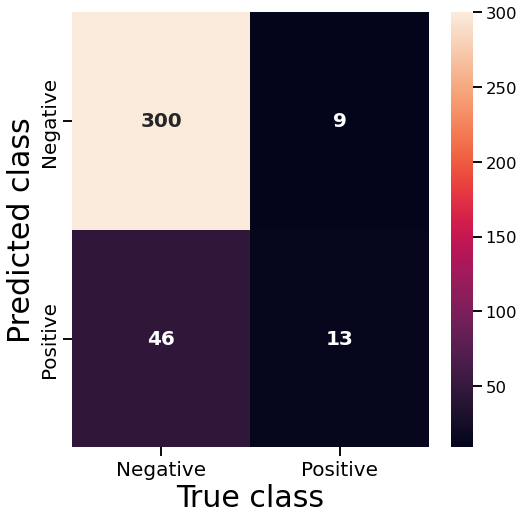

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_test_pred_gr)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})

labels = ['Negative', 'Positive']
ax.set_xticklabels(labels[::1], fontsize=20);
ax.set_yticklabels(labels[::1], fontsize=20);
ax.set_ylabel('Predicted class', fontsize=30);
ax.set_xlabel('True class', fontsize=30)

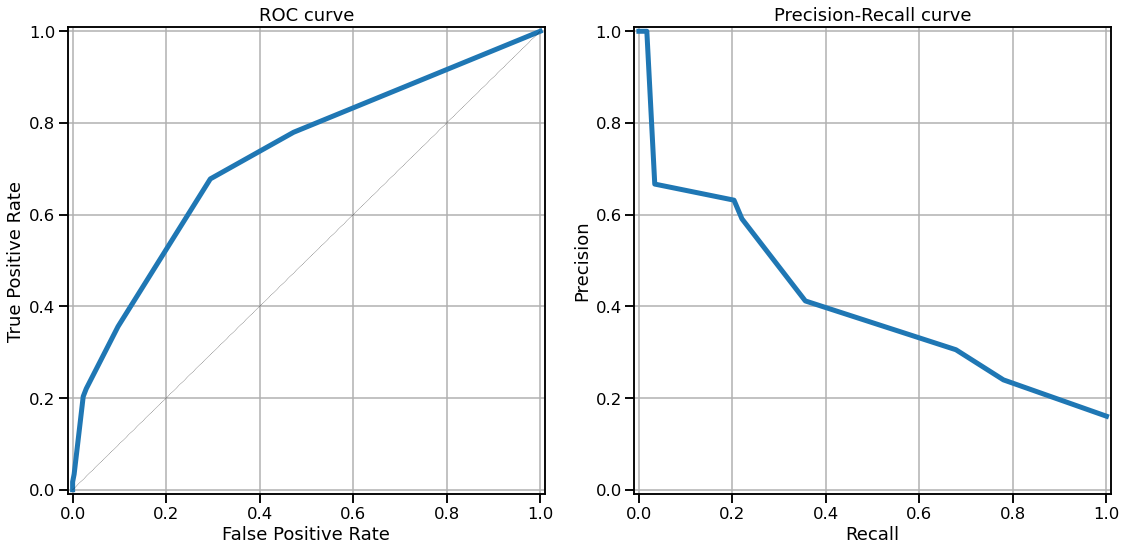

In [48]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_prob = GR.predict_proba(X_test)


ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

#---------------------------------------------------------------------------------------------#

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

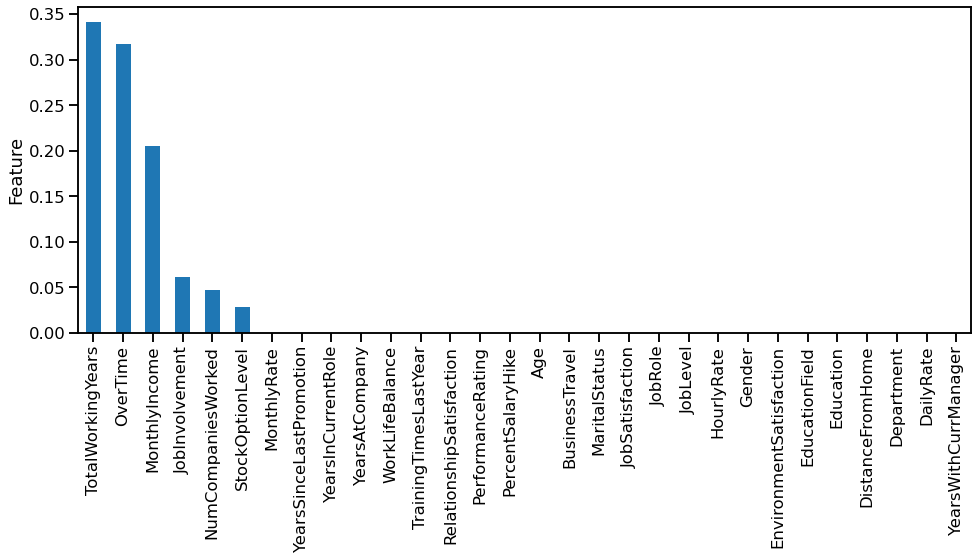

In [49]:
feature_imp = pd.Series(GR.best_estimator_.feature_importances_, index=feature_cols).sort_values(ascending=False)
ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

### RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=66)
RF = RF.fit(X_train, y_train)

In [51]:
y_train_pred_rf = RF.predict(X_train)
y_test_pred_rf = RF.predict(X_test)

train_test_full_error_rf = pd.concat([measure_error(y_train, y_train_pred_rf, 'train'),
                              measure_error(y_test, y_test_pred_rf, 'test')],
                              axis=1)
train_test_full_error_rf.to_clipboard(excel=True,sep='\t')
train_test_full_error_rf

,train,test
accuracy,1.0,0.850543
precision,1.0,0.666667
recall,1.0,0.135593
f1,1.0,0.225352


In [52]:
confusion_matrix(y_test, y_test_pred_rf)

array([[305,   4],
       [ 51,   8]], dtype=int64)

In [53]:
roc_auc_score(y_test, y_test_pred_rf)

0.5613241182601065

#### Using CrossValidation to tune parameters

In [54]:
params_grid_rf = { 'max_depth': [None, 2, 3, 5], 
                   'min_samples_split': [2, 4, 10],
                   'min_samples_leaf': [1, 2, 4, 10],
                   'n_estimators':[10, 30, 50, 100, 200, 300, 350, 400, 450, 500, 1000],
                   'bootstrap': [True, False]}

rf_gr = GridSearchCV(RandomForestClassifier(random_state=77), 
                     params_grid_rf, 
                     scoring="accuracy", 
                     cv=5, 
                     n_jobs=-1)


rf_gr = rf_gr.fit(X_train, y_train)

In [55]:
rf_gr.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [56]:
y_train_pred_rf_gr = rf_gr.predict(X_train)
y_test_pred_rf_gr = rf_gr.predict(X_test)

train_test_rf_gr_error = pd.concat([measure_error(y_train, y_train_pred_rf_gr, 'train'),
                                 measure_error(y_test, y_test_pred_rf_gr, 'test')],
                                axis=1)

In [57]:
train_test_rf_gr_error.to_clipboard(excel=True,sep='\t')
train_test_rf_gr_error

,train,test
accuracy,0.992740,0.858696
precision,1.000000,0.705882
recall,0.955056,0.203390
f1,0.977011,0.315789


In [58]:
confusion_matrix(y_test, y_test_pred_rf_gr)

array([[304,   5],
       [ 47,  12]], dtype=int64)

In [59]:
roc_auc_score(y_test, y_test_pred_rf_gr)

0.5936043003675058

#### Visualize the confusion matrix, ROC-AUC and feature importance

Text(0.5, 40.5, 'True class')

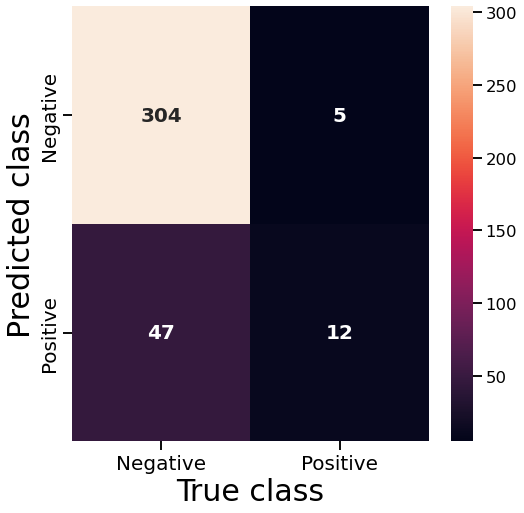

In [60]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_test_pred_rf_gr)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})

labels = ['Negative', 'Positive']
ax.set_xticklabels(labels[::1], fontsize=20);
ax.set_yticklabels(labels[::1], fontsize=20);
ax.set_ylabel('Predicted class', fontsize=30);
ax.set_xlabel('True class', fontsize=30)

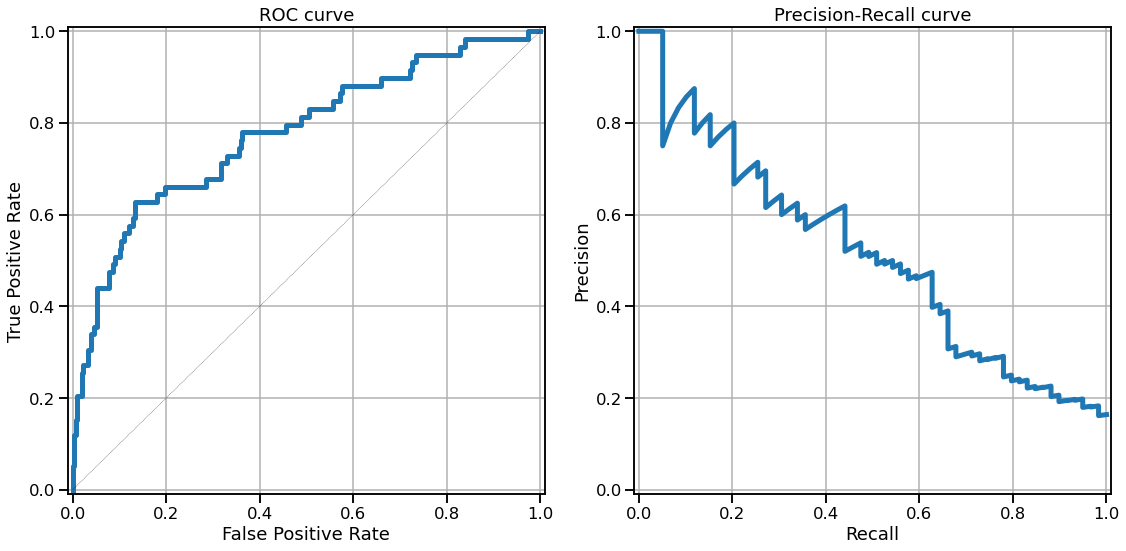

In [61]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_prob = rf_gr.predict_proba(X_test)


ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

#---------------------------------------------------------------------------------------------#

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

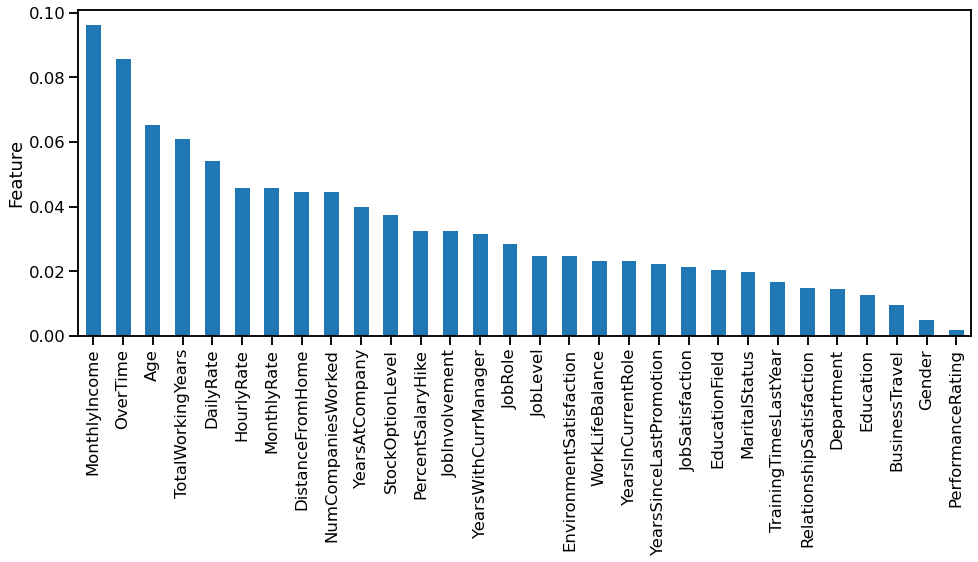

In [62]:
feature_imp = pd.Series(rf_gr.best_estimator_.feature_importances_, index=feature_cols).sort_values(ascending=False)
ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

### LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

train_test_full_error_lr = pd.concat([measure_error(y_train, y_train_pred_lr, 'train'),
                              measure_error(y_test, y_test_pred_lr, 'test')],
                              axis=1)

train_test_full_error_lr

,train,test
accuracy,0.872051,0.864130
precision,0.746667,0.714286
recall,0.314607,0.254237
f1,0.442688,0.375000


In [64]:
roc_auc_score(y_test, y_test_pred_lr)

0.6174099062037189

In [65]:
from sklearn.linear_model import LogisticRegressionCV
lr_l2 = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [66]:
y_train_pred_lr_l2 = lr_l2.predict(X_train)
y_test_pred_lr_l2 = lr_l2.predict(X_test)

train_test_lr_l2_error = pd.concat([measure_error(y_train, y_train_pred_lr_l2, 'train'),
                                 measure_error(y_test, y_test_pred_lr_l2, 'test')],
                                axis=1)

In [67]:
train_test_lr_l2_error

,train,test
accuracy,0.876588,0.877717
precision,0.762500,0.769231
recall,0.342697,0.338983
f1,0.472868,0.470588


In [68]:
confusion_matrix(y_test, y_test_pred_lr_l2)

array([[303,   6],
       [ 39,  20]], dtype=int64)

In [69]:
roc_auc_score(y_test, y_test_pred_lr_l2)

0.6597827875596511

Text(0.5, 40.5, 'True class')

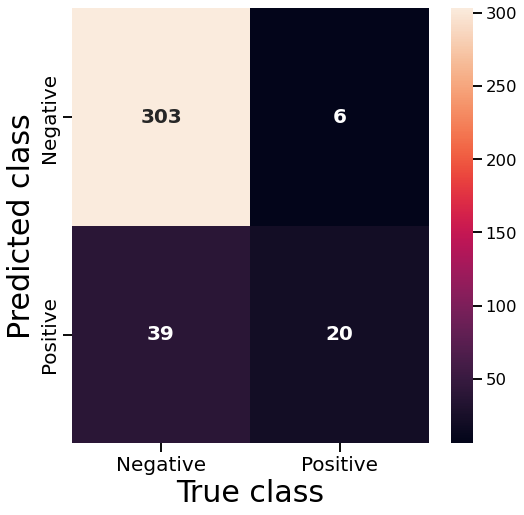

In [70]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_test_pred_lr_l2)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})

labels = ['Negative', 'Positive']
ax.set_xticklabels(labels[::1], fontsize=20);
ax.set_yticklabels(labels[::1], fontsize=20);
ax.set_ylabel('Predicted class', fontsize=30);
ax.set_xlabel('True class', fontsize=30)

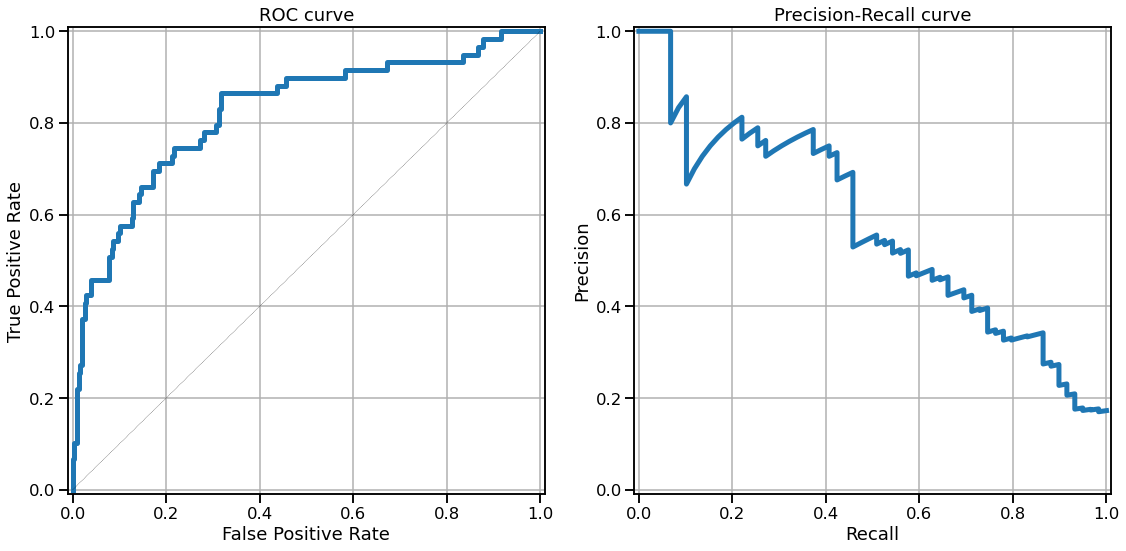

In [71]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_prob = lr_l2.predict_proba(X_test)


ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

#---------------------------------------------------------------------------------------------#

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

train_test_full_error_knn = pd.concat([measure_error(y_train, y_train_pred_knn, 'train'),
                              measure_error(y_test, y_test_pred_knn, 'test')],
                              axis=1)

train_test_full_error_knn


,train,test
accuracy,0.872051,0.836957
precision,0.760563,0.470588
recall,0.303371,0.135593
f1,0.433735,0.210526


In [73]:
roc_auc_score(y_test, y_test_pred_knn)

0.5532335033733751

#### Using CrossValidation to tune parameters

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict

param_grid_knn = {'n_neighbors':range(1, 10, 1)}

knn_gr = GridSearchCV(KNeighborsClassifier(),
                  param_grid=param_grid_knn,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

knn_gr = knn_gr.fit(X_train, y_train)

In [75]:
knn_gr.best_params_

{'n_neighbors': 8}

In [76]:
y_train_pred_knn_gr = knn_gr.predict(X_train)
y_test_pred_knn_gr = knn_gr.predict(X_test)

train_test_knn_gr_error = pd.concat([measure_error(y_train, y_train_pred_knn_gr, 'train'),
                                 measure_error(y_test, y_test_pred_knn_gr, 'test')],
                                axis=1)
train_test_knn_gr_error

,train,test
accuracy,0.859347,0.845109
precision,0.960000,0.750000
recall,0.134831,0.050847
f1,0.236453,0.095238


In [77]:
roc_auc_score(y_test, y_test_pred_knn_gr)

0.523805605836213

Text(0.5, 40.5, 'True class')

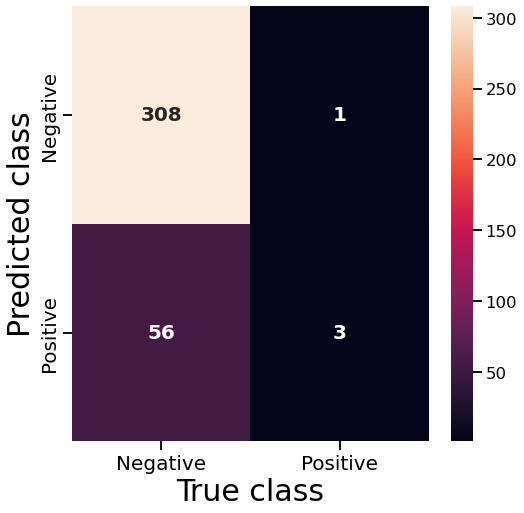

In [78]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_test_pred_knn_gr)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})

labels = ['Negative', 'Positive']
ax.set_xticklabels(labels[::1], fontsize=20);
ax.set_yticklabels(labels[::1], fontsize=20);
ax.set_ylabel('Predicted class', fontsize=30);
ax.set_xlabel('True class', fontsize=30)

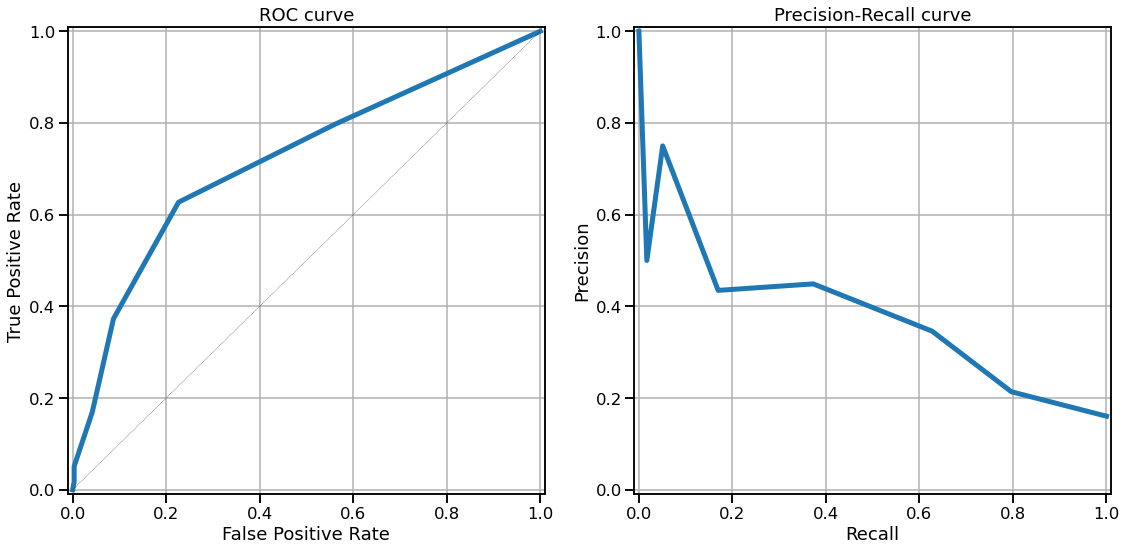

In [79]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_prob = knn_gr.predict_proba(X_test)


ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

#---------------------------------------------------------------------------------------------#

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### Performance conclusion

In [80]:
train_test_full_error_default = pd.concat([measure_error(y_test, y_test_pred, 'Decision Tree Classifier test score'),
                                  measure_error(y_test, y_test_pred_rf, 'RandomForestClassifier test score'),
                                  measure_error(y_test, y_test_pred_lr, 'LogisticRegression test score'),
                                  measure_error(y_test, y_test_pred_knn, 'KNN test score')],
                              axis=1)
train_test_full_error_default.to_clipboard(excel=True,sep='\t')
train_test_full_error_default

,Decision Tree Classifier test score,RandomForestClassifier test score,LogisticRegression test score,KNN test score
accuracy,0.777174,0.850543,0.864130,0.836957
precision,0.338028,0.666667,0.714286,0.470588
recall,0.406780,0.135593,0.254237,0.135593
f1,0.369231,0.225352,0.375000,0.210526


In [81]:
train_test_full_error_cv = pd.concat([measure_error(y_test, y_test_pred_gr, 'Decision Tree Classifier test score'),
                                  measure_error(y_test, y_test_pred_rf_gr, 'RandomForestClassifier test score'),
                                  measure_error(y_test, y_test_pred_lr_l2, 'LogisticRegression test score'),
                                  measure_error(y_test, y_test_pred_knn_gr, 'KNN test score')],
                              axis=1)
train_test_full_error_cv

,Decision Tree Classifier test score,RandomForestClassifier test score,LogisticRegression test score,KNN test score
accuracy,0.850543,0.858696,0.877717,0.845109
precision,0.590909,0.705882,0.769231,0.750000
recall,0.220339,0.203390,0.338983,0.050847
f1,0.320988,0.315789,0.470588,0.095238


In [82]:
train_test_full_error_cv.to_clipboard(excel=True,sep='\t')